In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Download resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Add this line to download the required resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
df = pd.read_csv("spotify_reviews.csv")

In [6]:
# preprocessing
# Inisialisasi tools NLP
stop_words = set(stopwords.words('indonesian') + stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Terapkan cleaning
df['clean_content'] = df['content'].astype(str).apply(clean_text)

In [7]:
print("Contoh Ulasan Positif:\n")
print(df[df['sentiment'] == 'positive'][['content']].sample(5))

print("\nContoh Ulasan Negatif:\n")
print(df[df['sentiment'] == 'negative'][['content']].sample(5))

print("\nContoh Ulasan Netral:\n")
print(df[df['sentiment'] == 'neutral'][['content']].sample(5))


Contoh Ulasan Positif:

                                               content
235  pake penyimpanan tulisannya 14MB tapi habis di...
857                                       bagus bgt🌺😊😏
64   Terimakasih untuk aplikasi ini saya memang suk...
136                                             mantap
247                 seru banget untuk dengarkan musik,

Contoh Ulasan Negatif:

                                               content
483  spotify ga responsif aneh, mau nyetel lagu ata...
557  makin lama makin kikir nih aplikasi, pilih lag...
576                               iklan terlalu banyak
307      aplikasinya ngebug, iklannya ga muncul muncul
316                      bikin paket premium mini lagi

Contoh Ulasan Netral:

                                               content
221  kenapa sih spotify suka tiba2 mati, baru muter...
625  kalo gak premium cmn bisa beberapa lagunyo ant...
231                                      lumayan bagus
975  agak disayangkan tidak ada paket perminggu

In [8]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['clean_content'])

# Label (target)
y = df['sentiment']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)


In [10]:
from sklearn.preprocessing import LabelEncoder

Encoder = LabelEncoder()
# Use y_train and y_test as the variables containing the training and testing labels
Train_Y_encoded = Encoder.fit_transform(y_train)
Test_Y_encoded = Encoder.transform(y_test) # Use transform for test set to avoid fitting again

In [11]:
Test_Y_encoded

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 1])

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score if not already imported

# Inisialisasi dan latih Random Forest
# RF = RandomForestClassifier(n_estimators=100, random_state=42) # This was done in the previous cell
# RF.fit(Train_X_Tfidf, Train_Y) # Use the correct training variables

# Assuming rf_model from the previous cell is the model you want to use
# Prediksi terhadap data uji
predictions_RF = rf_model.predict(X_test) # Use X_test for prediction as done previously

# Evaluasi akurasi
# print("Random Forest Accuracy Score ->", accuracy_score(predictions_RF, Test_Y) * 100) # Use y_test for the true labels
print("Random Forest Accuracy Score ->", accuracy_score(predictions_RF, y_test) * 100)



Random Forest Accuracy Score -> 82.0


Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.19      0.31        52
     neutral       0.00      0.00      0.00        10
    positive       0.82      0.99      0.90       238

    accuracy                           0.82       300
   macro avg       0.55      0.39      0.40       300
weighted avg       0.80      0.82      0.77       300



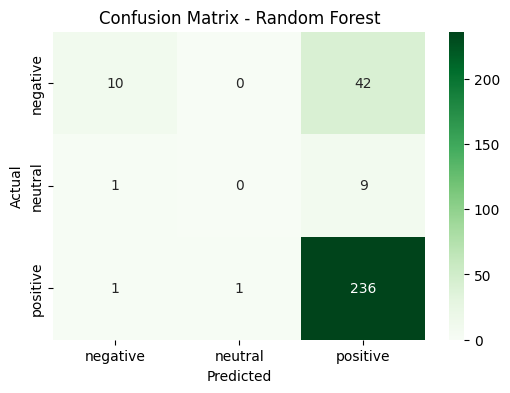

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-13-187337335.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


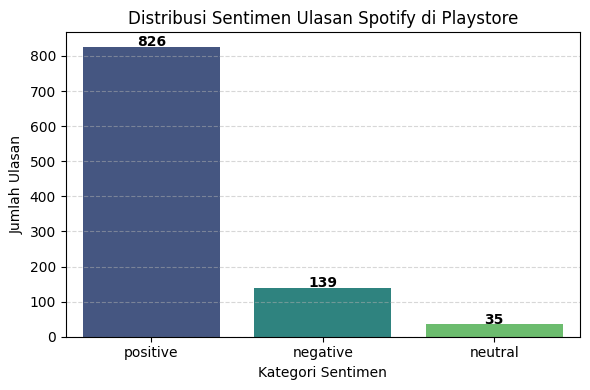

In [13]:
# Hitung jumlah masing-masing label sentimen
sentiment_counts = df['sentiment'].value_counts()

# Buat grafik batang (bar chart)
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribusi Sentimen Ulasan Spotify di Playstore")
plt.xlabel("Kategori Sentimen")
plt.ylabel("Jumlah Ulasan")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Tambahkan angka jumlah di atas setiap batang
for i, v in enumerate(sentiment_counts.values):
    ax.text(i, v + 2, str(v), color='black', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()